# Exploratory Data Analysis
### Data Set Summary Statistics

In [39]:
###importing libraries necessary for exploratory data analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

In [40]:
###importing initial csv file containing the data and taking small sample of the data
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DS_FinalProject_Data_BWT.csv')
df.sample(5)

,age,menopause,tumer-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiate,class
225,60-69',ge40',30-34',0-2',no',1',right',left_up',no',no-recurrence-events'
85,50-59',ge40',35-39',0-2',no',3',left',left_up',no',no-recurrence-events'
261,30-39',premeno',25-29',0-2',no',1',left',central',no',no-recurrence-events'
220,50-59',ge40',25-29',0-2',no',1',left',left_low',no',no-recurrence-events'
133,40-49',premeno',25-29',0-2',no',2',right',left_low',no',recurrence-events'


In [41]:
###fixing typo in name of column
df=df.rename(columns={'tumer-size':'tumor-size'})

In [42]:
###looking for presence of missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          286 non-null    object
 1   menopause    286 non-null    object
 2   tumor-size   286 non-null    object
 3   inv-nodes    286 non-null    object
 4   node-caps    278 non-null    object
 5   deg-malig    286 non-null    object
 6   breast       286 non-null    object
 7   breast-quad  285 non-null    object
 8   irradiate    286 non-null    object
 9   class        286 non-null    object
dtypes: object(10)
memory usage: 22.5+ KB


In [43]:
###dropping rows containing missing data
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 277 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          277 non-null    object
 1   menopause    277 non-null    object
 2   tumor-size   277 non-null    object
 3   inv-nodes    277 non-null    object
 4   node-caps    277 non-null    object
 5   deg-malig    277 non-null    object
 6   breast       277 non-null    object
 7   breast-quad  277 non-null    object
 8   irradiate    277 non-null    object
 9   class        277 non-null    object
dtypes: object(10)
memory usage: 23.8+ KB


In [44]:
###describing dataset after dropping rows containing missing data
df.describe()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiate,class
count,277,277,277,277,277,277,277,277,277,277
unique,6,3,11,7,2,3,2,5,2,2
top,50-59',premeno',30-34',0-2',no',2',left',left_low',no',no-recurrence-events'
freq,91,149,57,209,221,129,145,106,215,196


In [45]:
###subselection looking at differences in cancer recurrence
df.groupby('class').describe()

age                     menopause                   \
                      count unique     top freq     count unique       top   
class                                                                        
no-recurrence-events'   196      6  50-59'   69       196      3  premeno'   
recurrence-events'       81      4  40-49'   27        81      2  premeno'   

                           tumor-size         ... breast      breast-quad  \
                      freq      count unique  ...    top freq       count   
class                                         ...                           
no-recurrence-events'  101        196     11  ...  left'  100         196   
recurrence-events'      48         81     10  ...  left'   45          81   

                                             irradiate                   
                      unique        top freq     count unique  top freq  
class                                                                    
no-recurrence-events'      5  left_low'   73       196      2  no'  164  
recurrence-events'         5  left_low'   33        81      2  no'   51  

[2 rows x 36 columns]

In [67]:
###converting recurrence class to binary values using new column 'class_binary'
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['class_binary'] = label_encoder.fit_transform(df['class'])
df['node-caps_binary'] = label_encoder.fit_transform(df['node-caps'])
df.sample(3)

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiate,class,class_binary,node-caps_binary
164,44.5,ge40,22.0,4.0,no,3,right,left_low,yes,recurrence-events,1,0
110,64.5,ge40,17.0,1.0,no,1,right,left_up,no,no-recurrence-events,0,0
265,54.5,ge40,2.0,1.0,no,2,left,central,no,no-recurrence-events,0,0


In [47]:
###two-way frequency table of class and age
pd.crosstab(index=df['class_binary'], columns=df['age'])

age,20-29',30-39',40-49',50-59',60-69',70-79'
class_binary,,,,,,
0,1,21,62,69,38,5
1,0,15,27,22,17,0


In [48]:
###two-way frequency table of class and menopause
pd.crosstab(index=df['class_binary'], columns=df['menopause'])

menopause,ge40',lt40',premeno'
class_binary,,,
0,90,5,101
1,33,0,48


In [49]:
###two-way frequency table of class and tumor-size
pd.crosstab(index=df['class_binary'], columns=df['tumor-size'])

tumor-size,0-4',10-14',15-19',20-24',25-29',30-34',35-39',40-44',45-49',5-9',50-54'
class_binary,,,,,,,,,,,
0,7,27,23,34,33,33,12,16,2,4,5
1,1,1,6,14,18,24,7,6,1,0,3


In [50]:
###two-way frequency table of class and inv-nodes
pd.crosstab(index=df['class_binary'], columns=df['inv-nodes'])

inv-nodes,0-2',12-14',15-17',24-26',3-5',6-8',9-11'
class_binary,,,,,,,
0,166,1,3,0,17,7,2
1,43,2,3,1,17,10,5


In [51]:
###two-way frequency table of class and node-caps
pd.crosstab(index=df['class_binary'], columns=df['node-caps'])

node-caps,no',yes'
class_binary,,
0,171,25
1,50,31


In [52]:
###two-way frequency table of class and deg-malig
pd.crosstab(index=df['class_binary'], columns=df['deg-malig'])

deg-malig,1',2',3'
class_binary,,,
0,57,101,38
1,9,28,44


In [53]:
###two-way frequency table of class and breast
pd.crosstab(index=df['class_binary'], columns=df['breast'])

breast,left',right'
class_binary,,
0,100,96
1,45,36


In [54]:
###two-way frequency table of class and breast-quad
pd.crosstab(index=df['class_binary'], columns=df['breast-quad'])

breast-quad,central',left_low',left_up',right_low',right_up'
class_binary,,,,,
0,17,73,69,17,20
1,4,33,25,6,13


In [55]:
###two-way frequency table of class and irradiate
pd.crosstab(index=df['class_binary'], columns=df['irradiate'])

irradiate,no',yes'
class_binary,,
0,164,32
1,51,30


In [56]:
###function to remove trailing quotation marks for each data point
def remove_trailing_quotes(value):
       return re.sub(r"[\"\',]+$", "", str(value))

###applies function to the relevant columns
for column in df.columns:
  df[column] = df[column].apply(remove_trailing_quotes)

In [57]:
df.sample(3)

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiate,class,class_binary,node-caps_binary
160,50-59,ge40,25-29,3-5,yes,3,right,left_up,no,no-recurrence-events,0,1
7,40-49,premeno,10-14,0-2,no,2,left,left_up,no,no-recurrence-events,0,0
232,50-59,premeno,15-19,0-2,no,2,right,right_low,no,no-recurrence-events,0,0


In [58]:
###function to calculate the middle number of a range
def get_middle_number(range_string):
  try:
    start, end = map(int, range_string.split('-'))
    middle = (start + end) / 2
    return middle
  except (ValueError, AttributeError):
    return np.nan  ###handles cases where the range is not in the expected format

###applies the function to necessary columns
for column in ['tumor-size', 'age', 'inv-nodes']:
  df[column] = df[column].apply(get_middle_number)

In [59]:
df.sample(5)

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiate,class,class_binary,node-caps_binary
46,64.5,ge40,12.0,1.0,no,2,right,left_up,yes,no-recurrence-events,0,0
173,54.5,premeno,27.0,1.0,no,1,right,left_up,no,recurrence-events,1,0
24,34.5,premeno,17.0,7.0,yes,3,left,left_low,yes,recurrence-events,1,1
254,44.5,premeno,27.0,1.0,no,3,right,left_up,yes,no-recurrence-events,0,0
265,54.5,ge40,2.0,1.0,no,2,left,central,no,no-recurrence-events,0,0


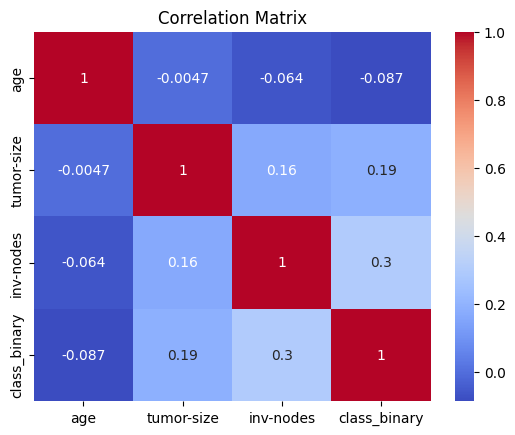

In [60]:
###creates correlation matrix of numerical columns to compare to with class_binary column
correlation_matrix = df[['age', 'tumor-size', 'inv-nodes', 'class_binary']].corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

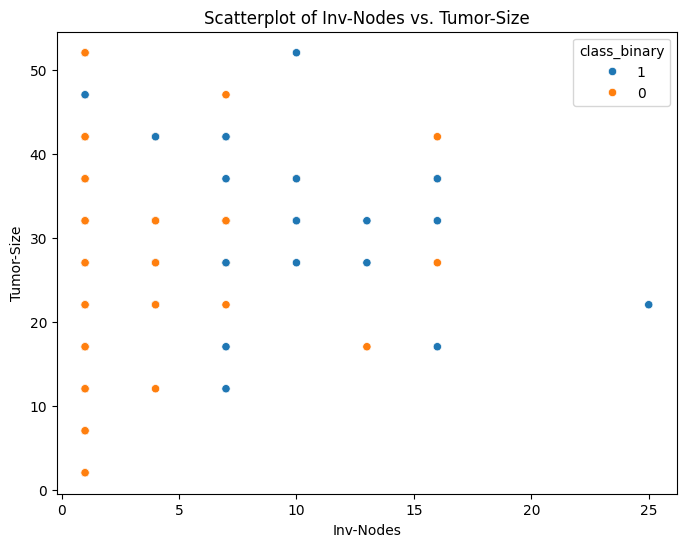

In [61]:
###create scatterplot of highest correlation betwenn two variables class_binary and inv-nodes
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='inv-nodes', y='tumor-size', hue='class_binary')
plt.title('Scatterplot of Inv-Nodes vs. Tumor-Size')
plt.xlabel('Inv-Nodes')
plt.ylabel('Tumor-Size')
plt.show()

### Data Set Graphical Exploration

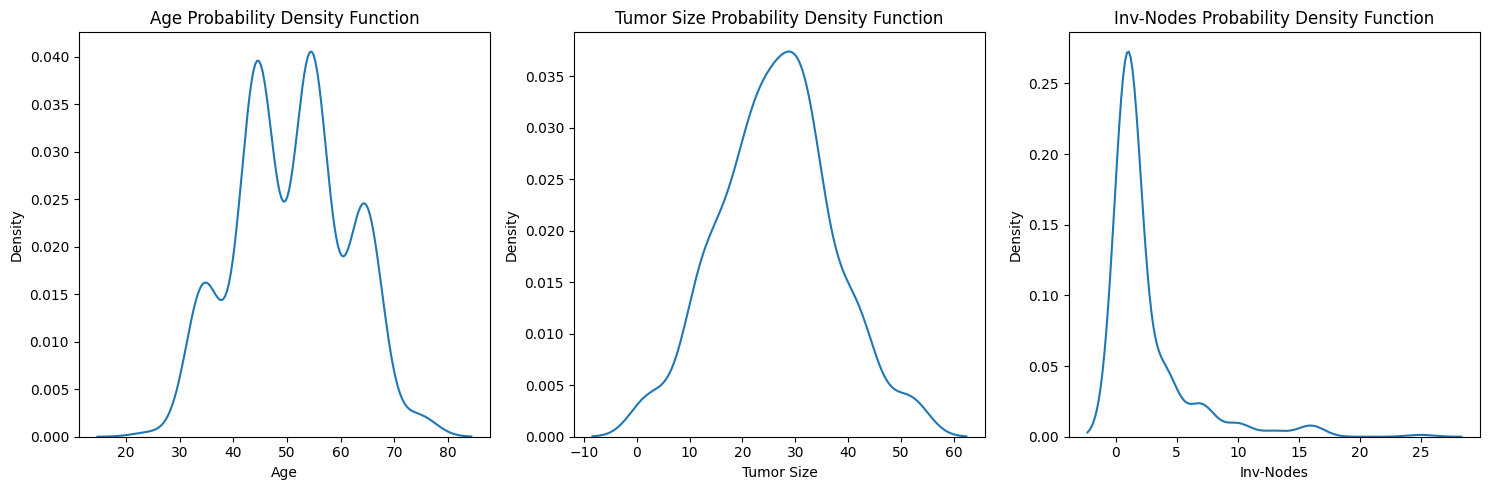

In [62]:
###creates subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  ###1row, 3 columns

###converts relevant columns to numeric before plotting
for column in ['age', 'tumor-size', 'inv-nodes']:
    df[column] = pd.to_numeric(df[column])

###plots 'age' PDF
sns.kdeplot(df['age'], ax=axes[0])
axes[0].set_title('Age Probability Density Function')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Density')

###plots 'tumor-size' PDF
sns.kdeplot(df['tumor-size'], ax=axes[1])
axes[1].set_title('Tumor Size Probability Density Function')
axes[1].set_xlabel('Tumor Size')
axes[1].set_ylabel('Density')

###plots 'inv-nodes' PDF
sns.kdeplot(df['inv-nodes'], ax=axes[2])
axes[2].set_title('Inv-Nodes Probability Density Function')
axes[2].set_xlabel('Inv-Nodes')
axes[2].set_ylabel('Density')

###adjusts layout and display
plt.tight_layout()
plt.show()

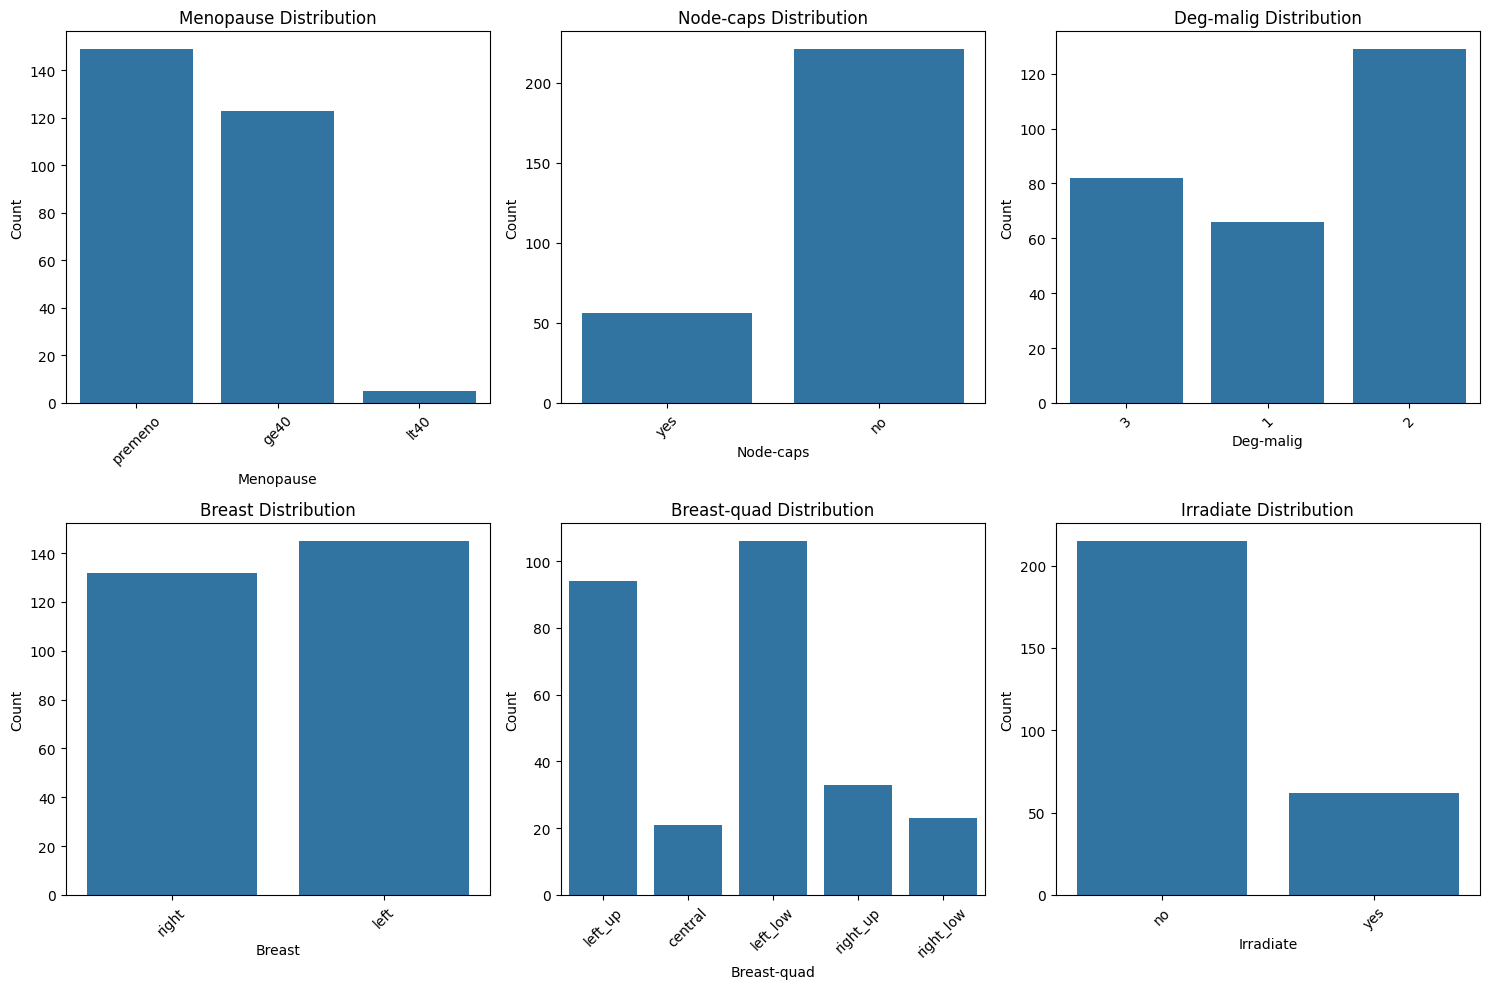

In [63]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  ###2 rows, 3 columns

###list of categorical variables
categorical_vars = ['menopause', 'node-caps', 'deg-malig', 'breast', 'breast-quad', 'irradiate']

###iterates through variables and create bar plots
for i, var in enumerate(categorical_vars):
    row = i // 3  ###calculates row index
    col = i % 3   ###calculates column index
    ax = axes[row, col]  ###assigns subplot

    ###creates bar plots using seaborn's countplot
    sns.countplot(x=var, data=df, ax=ax)
    ax.set_title(f'{var.capitalize()} Distribution')  ####sets title
    ax.set_xlabel(var.capitalize())  ###sets x-axis label
    ax.set_ylabel('Count')  ###sets y-axis label

    ###rotates x-axis labels if they are long
    ax.tick_params(axis='x', rotation=45)

###adjusts layout and display
plt.tight_layout()
plt.show()

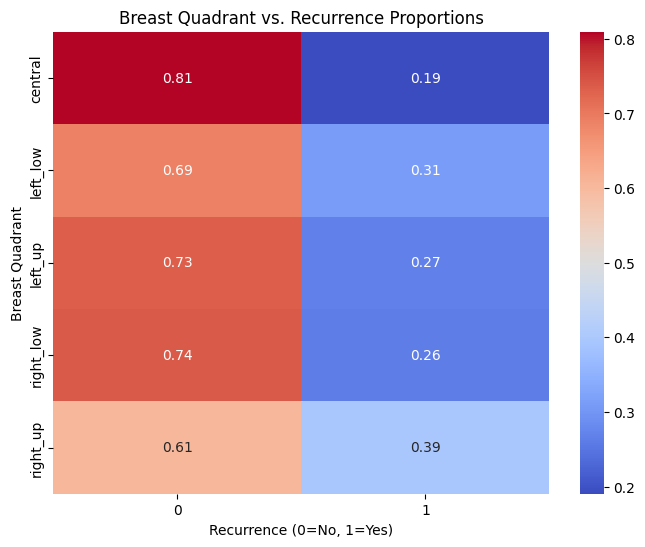

In [64]:
###heatmap comparing breast quadrant to recurrence
###creates frequency table to be displayed by heatmap
quadrant_recurrence = pd.crosstab(index=df['breast-quad'], columns=df['class_binary'],normalize='index')
plt.figure(figsize=(8, 6))
sns.heatmap(quadrant_recurrence, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Breast Quadrant vs. Recurrence Proportions")
plt.xlabel("Recurrence (0=No, 1=Yes)")
plt.ylabel("Breast Quadrant")
plt.show()

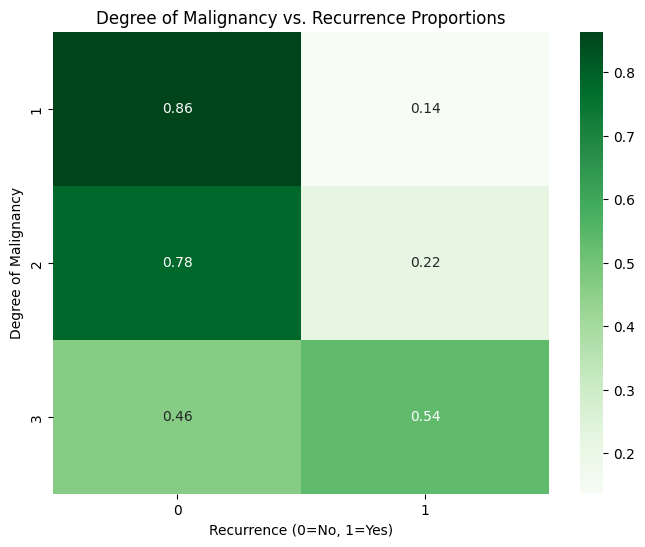

In [65]:
###creates the cross-tabulation used to form the heatmap
deg_malig_recurrence = pd.crosstab(index=df['deg-malig'], columns=df['class_binary'], normalize='index')

###creates the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(deg_malig_recurrence, annot=True, fmt=".2f", cmap="Greens")
plt.title("Degree of Malignancy vs. Recurrence Proportions")
plt.xlabel("Recurrence (0=No, 1=Yes)")
plt.ylabel("Degree of Malignancy")
plt.show()

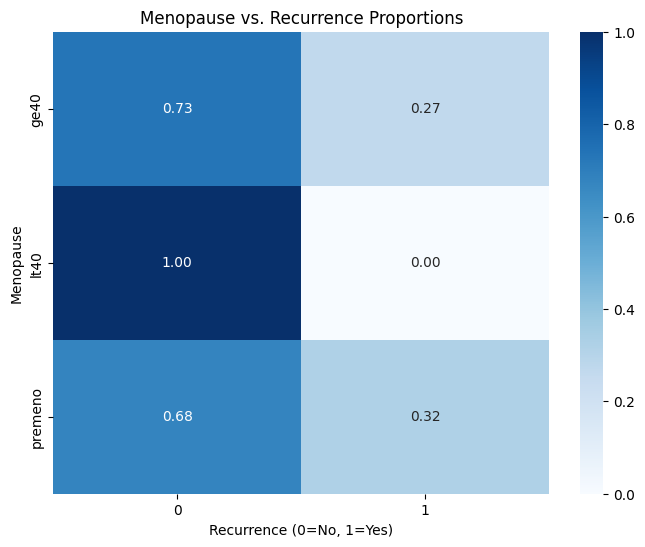

In [66]:
###creates frequency table used to form the heatmap, normalizing by index (menopause)
menopause_recurrence = pd.crosstab(index=df['menopause'], columns=df['class_binary'], normalize='index')

###creates the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(menopause_recurrence, annot=True, fmt=".2f", cmap="Blues")
plt.title("Menopause vs. Recurrence Proportions")
plt.xlabel("Recurrence (0=No, 1=Yes)")
plt.ylabel("Menopause")
plt.show()